In [83]:
# import the necessary packages
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2, VGG19, ResNet50, InceptionV3, DenseNet201, NASNetLarge, Xception
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
import argparse
import os
import cv2


In [52]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
INIT_LR = 1e-4
EPOCHS = 20
BS = 32

In [53]:
maskPath = '/home/drake/projects/Sp21/ML/gpu-train/face-mask-detector/dataset/with_mask/'
noMaskPath = '/home/drake/projects/Sp21/ML/gpu-train/face-mask-detector/dataset/without_mask/'
data = []
labels = []
maskFiles = os.listdir(maskPath)
noMaskFiles = os.listdir(noMaskPath)

In [54]:
for img in maskFiles:
    image = load_img(maskPath + img, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

    # update the data and labels lists, respectively
    data.append(image)
    labels.append('with_mask')

In [55]:
for img in noMaskFiles:
    image = load_img(noMaskPath + img, target_size=(224, 224))
    image = img_to_array(image)
    image = preprocess_input(image)

    # update the data and labels lists, respectively
    data.append(image)
    labels.append('without_mask')

In [56]:
data = np.array(data, dtype="float32")
labels = np.array(labels)

In [57]:
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

In [58]:
(trainX, testX, trainY, testY) = train_test_split(data, labels,
    test_size=0.20, stratify=labels, random_state=42)

In [59]:
aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest")

In [85]:
mobile = MobileNetV2(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
vgg = VGG19(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
res = ResNet50(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
incep = InceptionV3(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
dense = DenseNet201(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))
nas = NASNetLarge(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3))) 
xcep = Xception(weights="imagenet", include_top=False,
    input_tensor=Input(shape=(224, 224, 3)))

/home/drake/miniconda3/envs/ml/lib/python3.7/site-packages/keras_applications/mobilenet_v2.py:294: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


83689472/83683744 [==============================] - 15s 0us/step


In [108]:
modelNames = ['mobile', 'vgg', 'res', 'incep', 'dense', 'nas', 'xcep']

In [103]:
headmobile = mobile.output
headmobile = AveragePooling2D(pool_size=(7, 7))(headmobile)
headmobile = Flatten(name="flatten")(headmobile)
headmobile = Dense(128, activation="relu")(headmobile)
headmobile = Dropout(0.5)(headmobile)
headmobile = Dense(2, activation="softmax")(headmobile)

In [93]:
headvgg = vgg.output
headvgg = AveragePooling2D(pool_size=(7, 7))(headvgg)
headvgg = Flatten(name="flatten")(headvgg)
headvgg = Dense(128, activation="relu")(headvgg)
headvgg = Dropout(0.5)(headvgg)
headvgg = Dense(2, activation="softmax")(headvgg)

In [105]:
headres = res.output
headres = AveragePooling2D(pool_size=(7, 7))(headres)
headres = Flatten(name="flatten")(headres)
headres = Dense(128, activation="relu")(headres)
headres = Dropout(0.5)(headres)
headres = Dense(2, activation="softmax")(headres)

In [98]:
headdense = dense.output
headdense = AveragePooling2D(pool_size=(7, 7))(headdense)
headdense = Flatten(name="flatten")(headdense)
headdense = Dense(128, activation="relu")(headdense)
headdense = Dropout(0.5)(headdense)
headdense = Dense(2, activation="softmax")(headdense)

In [99]:
headnas = nas.output
headnas = AveragePooling2D(pool_size=(7, 7))(headnas)
headnas = Flatten(name="flatten")(headnas)
headnas = Dense(128, activation="relu")(headnas)
headnas = Dropout(0.5)(headnas)
headnas = Dense(2, activation="softmax")(headnas)

In [100]:
headxcep = xcep.output
headxcep = AveragePooling2D(pool_size=(7, 7))(headxcep)
headxcep = Flatten(name="flatten")(headxcep)
headxcep = Dense(128, activation="relu")(headxcep)
headxcep = Dropout(0.5)(headxcep)
headxcep = Dense(2, activation="softmax")(headxcep)

In [107]:
modelmobile = Model(inputs=mobile.input, outputs=headmobile)
modelvgg = Model(inputs=vgg.input, outputs=headvgg)
modelres = Model(inputs=res.input, outputs=headres)
modeldense = Model(inputs=dense.input, outputs=headdense)
modelnas = Model(nas.input, outputs=headnas)
modelxcep = Model(inputs=xcep.input, outputs=headxcep)

In [111]:
for layer in mobile.layers:
    layer.trainable = False
for layer in vgg.layers:
    layer.trainable = False
for layer in res.layers:
    layer.trainable = False
for layer in incep.layers:
    layer.trainable = False
for layer in dense.layers:
    layer.trainable = False
for layer in nas.layers:
    layer.trainable = False
for layer in xcep.layers:
    layer.trainable = False

In [117]:
from keras import backend as K
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
modelmobile.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy", f1_m, precision_m, recall_m])
modelvgg.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy", f1_m, precision_m, recall_m])
modelres.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy", f1_m, precision_m, recall_m])
modeldense.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy", f1_m, precision_m, recall_m])
modelnas.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy", f1_m, precision_m, recall_m])
modelxcep.compile(loss="binary_crossentropy", optimizer=opt,
    metrics=["accuracy", f1_m, precision_m, recall_m])

In [116]:
mobileHistory = modelmobile.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

  ...
    to  
  ['...']
Train for 34 steps, validate on 276 samples
Epoch 1/20
34/34 [==============================] - 9s 268ms/step - loss: 0.6253 - accuracy: 0.6610 - f1_m: 0.6566 - precision_m: 0.6566 - recall_m: 0.6566 - val_loss: 0.3396 - val_accuracy: 0.8711 - val_f1_m: 0.8711 - val_precision_m: 0.8711 - val_recall_m: 0.8711
Epoch 2/20
34/34 [==============================] - 7s 206ms/step - loss: 0.3747 - accuracy: 0.8380 - f1_m: 0.8395 - precision_m: 0.8395 - recall_m: 0.8395 - val_loss: 0.2268 - val_accuracy: 0.9180 - val_f1_m: 0.9180 - val_precision_m: 0.9180 - val_recall_m: 0.9180
Epoch 3/20
34/34 [==============================] - 7s 206ms/step - loss: 0.3025 - accuracy: 0.8670 - f1_m: 0.8680 - precision_m: 0.8680 - recall_m: 0.8680 - val_loss: 0.1399 - val_accuracy: 0.9727 - val_f1_m: 0.9727 - val_precision_m: 0.9727 - val_recall_m: 0.9727
Epoch 4/20
34/34 [==============================] - 7s 206ms/step - loss: 0.2328 - accuracy: 0.9157 - f1_m: 0.9157 - precision_m: 0.9

In [121]:
vggHistory = modelvgg.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

  ...
    to  
  ['...']
Train for 34 steps, validate on 276 samples
Epoch 1/20
34/34 [==============================] - 9s 257ms/step - loss: 0.8825 - accuracy: 0.5140 - f1_m: 0.5169 - precision_m: 0.5169 - recall_m: 0.5169 - val_loss: 0.5767 - val_accuracy: 0.7578 - val_f1_m: 0.7578 - val_precision_m: 0.7578 - val_recall_m: 0.7578
Epoch 2/20
34/34 [==============================] - 8s 238ms/step - loss: 0.7001 - accuracy: 0.5852 - f1_m: 0.5898 - precision_m: 0.5898 - recall_m: 0.5898 - val_loss: 0.4891 - val_accuracy: 0.9023 - val_f1_m: 0.9023 - val_precision_m: 0.9023 - val_recall_m: 0.9023
Epoch 3/20
34/34 [==============================] - 8s 232ms/step - loss: 0.6166 - accuracy: 0.6639 - f1_m: 0.6670 - precision_m: 0.6670 - recall_m: 0.6670 - val_loss: 0.4215 - val_accuracy: 0.9727 - val_f1_m: 0.9727 - val_precision_m: 0.9727 - val_recall_m: 0.9727
Epoch 4/20
34/34 [==============================] - 8s 238ms/step - loss: 0.5190 - accuracy: 0.7369 - f1_m: 0.7371 - precision_m: 0.7

In [122]:
resHistory = modelres.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

  ...
    to  
  ['...']
Train for 34 steps, validate on 276 samples
Epoch 1/20
34/34 [==============================] - 10s 282ms/step - loss: 0.3083 - accuracy: 0.8577 - f1_m: 0.8603 - precision_m: 0.8603 - recall_m: 0.8603 - val_loss: 0.8761 - val_accuracy: 0.5039 - val_f1_m: 0.5039 - val_precision_m: 0.5039 - val_recall_m: 0.5039
Epoch 2/20
34/34 [==============================] - 7s 219ms/step - loss: 0.0992 - accuracy: 0.9663 - f1_m: 0.9654 - precision_m: 0.9654 - recall_m: 0.9654 - val_loss: 0.8488 - val_accuracy: 0.5039 - val_f1_m: 0.5039 - val_precision_m: 0.5039 - val_recall_m: 0.5039
Epoch 3/20
34/34 [==============================] - 8s 222ms/step - loss: 0.0636 - accuracy: 0.9794 - f1_m: 0.9798 - precision_m: 0.9798 - recall_m: 0.9798 - val_loss: 0.8867 - val_accuracy: 0.5039 - val_f1_m: 0.5039 - val_precision_m: 0.5039 - val_recall_m: 0.5039
Epoch 4/20
34/34 [==============================] - 8s 225ms/step - loss: 0.0692 - accuracy: 0.9719 - f1_m: 0.9724 - precision_m: 0.

In [123]:
denseHistory = modeldense.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

  ...
    to  
  ['...']
Train for 34 steps, validate on 276 samples
Epoch 1/20
34/34 [==============================] - 16s 481ms/step - loss: 0.3384 - accuracy: 0.8427 - f1_m: 0.8441 - precision_m: 0.8441 - recall_m: 0.8441 - val_loss: 0.0364 - val_accuracy: 0.9883 - val_f1_m: 0.9883 - val_precision_m: 0.9883 - val_recall_m: 0.9883
Epoch 2/20
34/34 [==============================] - 8s 241ms/step - loss: 0.1302 - accuracy: 0.9532 - f1_m: 0.9540 - precision_m: 0.9540 - recall_m: 0.9540 - val_loss: 0.0183 - val_accuracy: 0.9961 - val_f1_m: 0.9961 - val_precision_m: 0.9961 - val_recall_m: 0.9961
Epoch 3/20
34/34 [==============================] - 8s 242ms/step - loss: 0.0968 - accuracy: 0.9635 - f1_m: 0.9642 - precision_m: 0.9642 - recall_m: 0.9642 - val_loss: 0.0167 - val_accuracy: 0.9961 - val_f1_m: 0.9961 - val_precision_m: 0.9961 - val_recall_m: 0.9961
Epoch 4/20
34/34 [==============================] - 8s 240ms/step - loss: 0.0767 - accuracy: 0.9747 - f1_m: 0.9752 - precision_m: 0.

In [126]:
nasHistory = modelnas.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

  ...
    to  
  ['...']
Train for 34 steps, validate on 276 samples
Epoch 1/20
34/34 [==============================] - 13s 393ms/step - loss: 0.0513 - accuracy: 0.9822 - f1_m: 0.9825 - precision_m: 0.9825 - recall_m: 0.9825 - val_loss: 0.0110 - val_accuracy: 0.9961 - val_f1_m: 0.9961 - val_precision_m: 0.9961 - val_recall_m: 0.9961
Epoch 2/20
34/34 [==============================] - 14s 398ms/step - loss: 0.0476 - accuracy: 0.9841 - f1_m: 0.9844 - precision_m: 0.9844 - recall_m: 0.9844 - val_loss: 0.0113 - val_accuracy: 0.9961 - val_f1_m: 0.9961 - val_precision_m: 0.9961 - val_recall_m: 0.9961
Epoch 3/20
34/34 [==============================] - 14s 408ms/step - loss: 0.0617 - accuracy: 0.9813 - f1_m: 0.9816 - precision_m: 0.9816 - recall_m: 0.9816 - val_loss: 0.0064 - val_accuracy: 0.9961 - val_f1_m: 0.9961 - val_precision_m: 0.9961 - val_recall_m: 0.9961
Epoch 4/20
34/34 [==============================] - 14s 401ms/step - loss: 0.0718 - accuracy: 0.9710 - f1_m: 0.9715 - precision_m:

In [127]:
xcepHistory = modelxcep.fit(
    aug.flow(trainX, trainY, batch_size=BS),
    steps_per_epoch=len(trainX) // BS,
    validation_data=(testX, testY),
    validation_steps=len(testX) // BS,
    epochs=EPOCHS)

  ...
    to  
  ['...']
Train for 34 steps, validate on 276 samples
Epoch 1/20
34/34 [==============================] - 10s 281ms/step - loss: 0.4011 - accuracy: 0.8221 - f1_m: 0.8223 - precision_m: 0.8223 - recall_m: 0.8223 - val_loss: 0.0610 - val_accuracy: 0.9766 - val_f1_m: 0.9766 - val_precision_m: 0.9766 - val_recall_m: 0.9766
Epoch 2/20
34/34 [==============================] - 8s 227ms/step - loss: 0.1365 - accuracy: 0.9532 - f1_m: 0.9540 - precision_m: 0.9540 - recall_m: 0.9540 - val_loss: 0.0288 - val_accuracy: 0.9844 - val_f1_m: 0.9844 - val_precision_m: 0.9844 - val_recall_m: 0.9844
Epoch 3/20
34/34 [==============================] - 8s 230ms/step - loss: 0.1159 - accuracy: 0.9625 - f1_m: 0.9632 - precision_m: 0.9632 - recall_m: 0.9632 - val_loss: 0.0328 - val_accuracy: 0.9844 - val_f1_m: 0.9844 - val_precision_m: 0.9844 - val_recall_m: 0.9844
Epoch 4/20
34/34 [==============================] - 8s 225ms/step - loss: 0.0968 - accuracy: 0.9691 - f1_m: 0.9697 - precision_m: 0.

In [132]:
predmobile = modelmobile.predict(testX, batch_size=BS)
predvgg = modelvgg.predict(testX, batch_size=BS)
predres = modelres.predict(testX, batch_size=BS)
preddense = modeldense.predict(testX, batch_size=BS)
prednas = modelnas.predict(testX, batch_size=BS)
predxcep = modelxcep.predict(testX, batch_size=BS)

In [133]:
predmobile = np.argmax(predmobile, axis=1)
predvgg = np.argmax(predvgg, axis=1)
predres = np.argmax(predres, axis=1)
preddense = np.argmax(preddense, axis=1)
prednas = np.argmax(prednas, axis=1)
predxcep = np.argmax(predxcep, axis=1)

In [144]:
print("Mobile", classification_report(testY.argmax(axis=1), predmobile,target_names=lb.classes_))
print("VGG", classification_report(testY.argmax(axis=1), predvgg,target_names=lb.classes_))
print("Res", classification_report(testY.argmax(axis=1), predres,target_names=lb.classes_))
print("Dense", classification_report(testY.argmax(axis=1), preddense,target_names=lb.classes_))
print("Nas", classification_report(testY.argmax(axis=1), prednas,target_names=lb.classes_))
print("Xcep",classification_report(testY.argmax(axis=1), predxcep,target_names=lb.classes_))

Mobile               precision    recall  f1-score   support

   with_mask       0.95      0.99      0.97       138
without_mask       0.99      0.95      0.97       138

    accuracy                           0.97       276
   macro avg       0.97      0.97      0.97       276
weighted avg       0.97      0.97      0.97       276

VGG               precision    recall  f1-score   support

   with_mask       1.00      0.99      1.00       138
without_mask       0.99      1.00      1.00       138

    accuracy                           1.00       276
   macro avg       1.00      1.00      1.00       276
weighted avg       1.00      1.00      1.00       276

Res               precision    recall  f1-score   support

   with_mask       1.00      0.01      0.01       138
without_mask       0.50      1.00      0.67       138

    accuracy                           0.50       276
   macro avg       0.75      0.50      0.34       276
weighted avg       0.75      0.50      0.34       276

Dens

In [145]:
modelNames = ['MobileNetV2', 'VGG19', 'ResNet50', 'DenseNet201', 'NASNetLarge', 'Xception']

In [135]:
modelvgg.save('VGG19', save_format="h5")
modelres.save('ResNet50', save_format="h5")
modeldense.save('DenseNet201', save_format="h5")
modelnas.save('NASNetLarge', save_format="h5")
modelxcep.save('Xception', save_format="h5")

In [136]:
modelHistories = []
modelHistories.append(mobileHistory)
modelHistories.append(vggHistory)
modelHistories.append(resHistory)
modelHistories.append(denseHistory)
modelHistories.append(nasHistory)
modelHistories.append(xcepHistory)

IndexError: index 4 is out of bounds for axis 0 with size 4

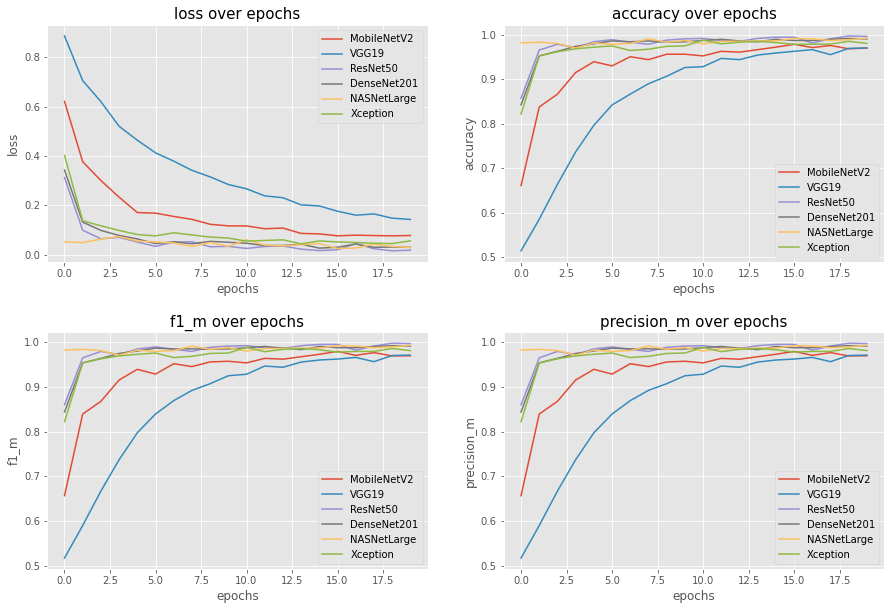

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.3)
for metric in modelHistories[0].history:
    index = list(modelHistories[0].history).index(metric)
    ax = axes.flatten()[index]
    name_index = 0
    for history in modelHistories:
        ax.plot(history.history[metric], label=modelNames[name_index])
        name_index += 1
    ax.set_title(metric+' over epochs', size=15)
    ax.set_xlabel('epochs')
    ax.set_ylabel(metric)
    plt.savefig(metric)
    ax.legend()
    

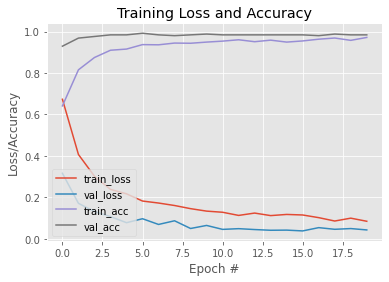

In [80]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
for history in modelHistories:
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig('loss_acc')

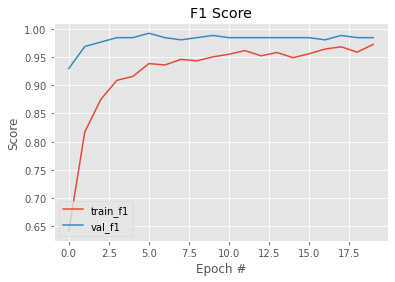

In [79]:
N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["f1_m"], label="train_f1")
plt.plot(np.arange(0, N), H.history["val_f1_m"], label="val_f1")
plt.title("F1 Score")
plt.xlabel("Epoch #")
plt.ylabel("Score")
plt.legend(loc="lower left")
plt.savefig('f1')